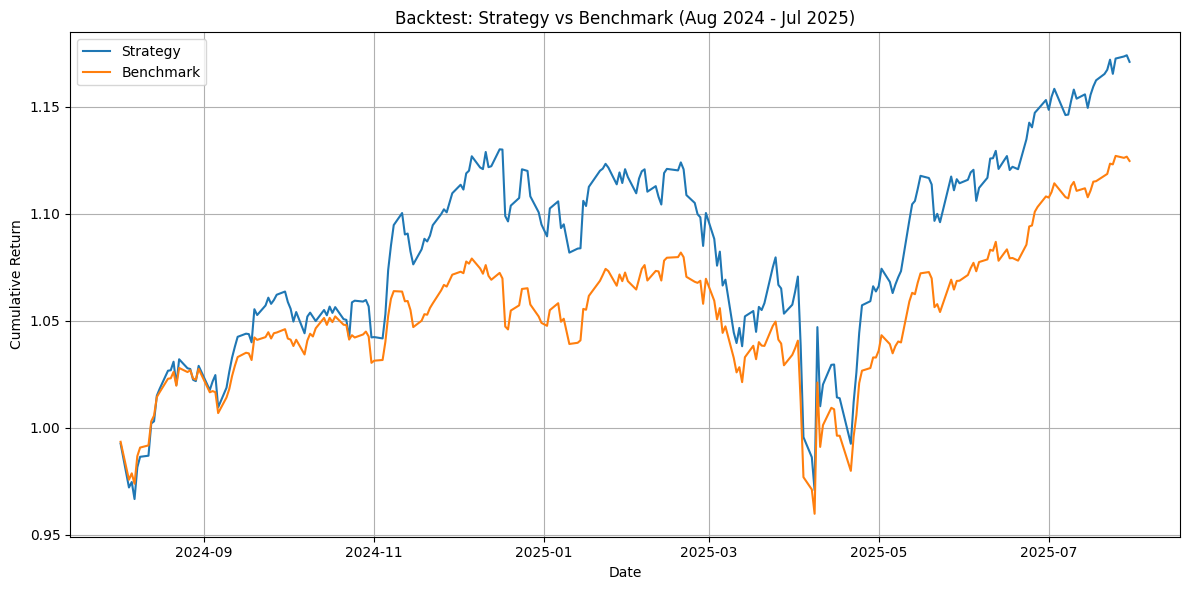

📊 Strategy Total Return: 17.10%
📊 Benchmark Total Return: 12.47%
⚖️ Strategy Sharpe Ratio: 1.09
⚖️ Benchmark Sharpe Ratio: 1.02


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your combined historical data
df = pd.read_csv("combined_cleaned.csv", parse_dates=["Date"], index_col="Date")

# Define backtesting period
backtest_start = "2024-08-01"
backtest_end = "2025-07-31"
df_backtest = df.loc[backtest_start:backtest_end].copy()

# Calculate daily returns
returns = df_backtest.pct_change().dropna()

# Strategy weights (from Task 4: Max Sharpe Portfolio)
strategy_weights = {
    "TSLA": 0.063,
    "BND": 0.56,
    "SPY": 0.377
}

# Benchmark weights (e.g., 60% SPY / 40% BND)
benchmark_weights = {
    "TSLA": 0.0,
    "BND": 0.4,
    "SPY": 0.6
}

# Compute strategy and benchmark daily returns
returns["Strategy"] = (
    returns["Close_TSLA"] * strategy_weights["TSLA"] +
    returns["Close_BND"] * strategy_weights["BND"] +
    returns["Close_SPY"] * benchmark_weights["SPY"]
)

returns["Benchmark"] = (
    returns["Close_TSLA"] * benchmark_weights["TSLA"] +
    returns["Close_BND"] * benchmark_weights["BND"] +
    returns["Close_SPY"] * benchmark_weights["SPY"]
)


# Compute cumulative returns
cumulative_returns = (1 + returns[["Strategy", "Benchmark"]]).cumprod()

# Plot cumulative performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label=["Strategy", "Benchmark"])
plt.title("Backtest: Strategy vs Benchmark (Aug 2024 - Jul 2025)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sharpe Ratio function
def sharpe_ratio(return_series, risk_free_rate=0.0):
    excess_return = return_series - risk_free_rate / 252
    return np.sqrt(252) * excess_return.mean() / excess_return.std()

# Final metrics
strategy_total_return = cumulative_returns["Strategy"].iloc[-1] - 1
benchmark_total_return = cumulative_returns["Benchmark"].iloc[-1] - 1

strategy_sharpe = sharpe_ratio(returns["Strategy"])
benchmark_sharpe = sharpe_ratio(returns["Benchmark"])

print(f"📊 Strategy Total Return: {strategy_total_return:.2%}")
print(f"📊 Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"⚖️ Strategy Sharpe Ratio: {strategy_sharpe:.2f}")
print(f"⚖️ Benchmark Sharpe Ratio: {benchmark_sharpe:.2f}")